In [89]:
import pandas as pd

In [90]:
data = pd.read_csv("Churn_Modelling.csv")

In [91]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [92]:
data.shape

(10000, 14)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [94]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [95]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [96]:
#Dropping irrelevant features

In [97]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [98]:
data = data.drop(['CustomerId','RowNumber','Surname'], axis = 1)

In [99]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
#Encoding data

In [101]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [102]:
data = pd.get_dummies(data, drop_first = True)

In [103]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [104]:
value_counts = data['Exited'].value_counts()

In [105]:
import seaborn as sns

In [106]:
import matplotlib.pyplot as plt

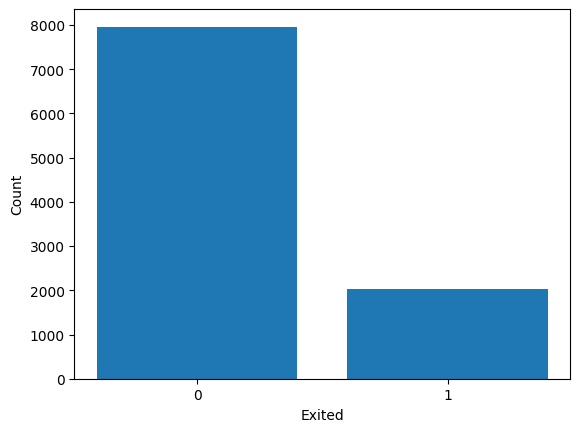

In [107]:
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks(value_counts.index, labels = [0,1])
plt.show()

In [171]:
y = data['Exited']
X = data.drop(['Exited'], axis = 1)

In [172]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [173]:
#Split dataset into training set and test set

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify = Y)

In [176]:
#Feature scaling

In [177]:
from sklearn.preprocessing import StandardScaler

In [178]:
sc = StandardScaler()


In [200]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [201]:
X_train

array([[-0.35173125,  0.59988323,  0.43891101, ...,  1.31767003,
         1.58785468,  0.81183138],
       [ 1.10163151,  0.09897794, -1.39648789, ..., -0.75891534,
        -0.62978056,  0.81183138],
       [ 0.64267485, -0.70247052,  0.07183123, ...,  1.31767003,
        -0.62978056,  0.81183138],
       ...,
       [ 0.20557327,  0.199159  ,  1.17307058, ..., -0.75891534,
        -0.62978056,  0.81183138],
       [ 0.94864596, -0.30174629,  0.80599079, ...,  1.31767003,
        -0.62978056,  0.81183138],
       [ 0.53339945,  1.00060746, -1.39648789, ...,  1.31767003,
        -0.62978056,  0.81183138]])

In [202]:
#Logistic Regression

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
log = LogisticRegression()

In [205]:
log.fit(X_train,Y_train)

LogisticRegression()

In [206]:
y_pred1 = log.predict(X_test)

In [207]:
from sklearn.metrics import accuracy_score


In [187]:
accuracy_score(Y_test, y_pred1)

0.808

In [208]:
accuracy_score(Y_test, y_pred1)

0.7771500313873195

In [188]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [189]:
precision_score(Y_test,y_pred1, zero_division=1)

0.5891472868217055

In [209]:
precision_score(Y_test,y_pred1, zero_division=1)

0.7676190476190476

In [190]:
recall_score(Y_test,y_pred1)

0.18673218673218672

In [210]:
recall_score(Y_test,y_pred1)

0.7784932388924662

In [191]:
f1_score(Y_test,y_pred1)

0.2835820895522388

In [211]:
f1_score(Y_test,y_pred1)

0.7730179028132993

In [192]:
#Handling imbalanced dataset with SMOTE

In [193]:
from imblearn.over_sampling import SMOTE

In [194]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [195]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [196]:
#split dataset into training and test set

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [212]:
#SVC

In [213]:
from sklearn import svm

In [214]:
svm = svm.SVC()

In [216]:
svm.fit(X_train,Y_train)

SVC()

In [219]:
y_pred2 = svm.predict(X_test)

In [220]:
accuracy_score(Y_test,y_pred2)

0.8367859384808537

In [221]:
precision_score(Y_test, y_pred2)

0.844103930712858

In [222]:
#kneighbours classifier

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [227]:
knn=KNeighborsClassifier()

In [228]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [229]:
y_pred3 = knn.predict(X_test)

In [230]:
accuracy_score(Y_test, y_pred3)

0.8179535467671061

In [231]:
precision_score(Y_test, y_pred3)

0.8069400630914827

In [232]:
#Decision tree classifier

In [235]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [236]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [237]:
y_pred4 = dt.predict(X_test)

In [238]:
accuracy_score(Y_test,y_pred4)

0.8000627746390458

In [239]:
precision_score(Y_test,y_pred4)

0.7799511002444988

In [240]:
#Random forest classifier

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
rf = RandomForestClassifier()

In [243]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [245]:
y_pred5 = rf.predict(X_test)

In [246]:
accuracy_score(Y_test,y_pred5)

0.869428750784683

In [247]:
precision_score(Y_test,y_pred5)

0.8674854557207499

In [248]:
#Gradient boosting classifier

In [249]:
from sklearn.ensemble import GradientBoostingClassifier

In [250]:
gbc = GradientBoostingClassifier()

In [251]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [252]:
y_pred6 = gbc.predict(X_test)

In [253]:
accuracy_score(Y_test,y_pred5)

0.869428750784683

In [255]:
precision_score(Y_test,y_pred6)

0.8397898883782009

In [257]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],'Accuracy':[accuracy_score(Y_test,y_pred1),accuracy_score(Y_test,y_pred2),accuracy_score(Y_test,y_pred3),accuracy_score(Y_test,y_pred4),accuracy_score(Y_test,y_pred5),accuracy_score(Y_test,y_pred6)]})

In [258]:
final_data

,Models,Accuracy
0,LR,0.777150
1,SVC,0.836786
2,KNN,0.817954
3,DT,0.800063
4,RF,0.869429
5,GB,0.837414


In [259]:
import seaborn as sns

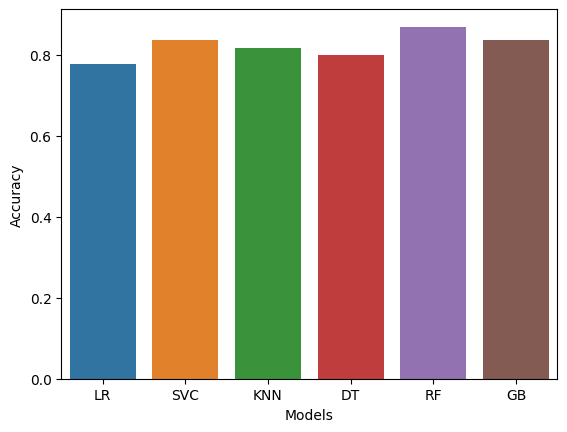

In [265]:
sns.barplot(data=final_data, x='Models', y='Accuracy')
plt.show()

In [266]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],'Precision':[precision_score(Y_test,y_pred1),precision_score(Y_test,y_pred2),precision_score(Y_test,y_pred3),precision_score(Y_test,y_pred4),precision_score(Y_test,y_pred5),precision_score(Y_test,y_pred6)]})

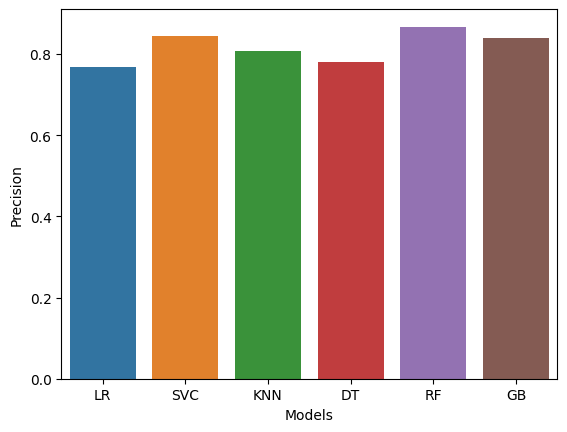

In [269]:
sns.barplot(data=final_data, x='Models', y='Precision')
plt.show()

In [270]:
# Save the model

In [271]:
X_res = sc.fit_transform(X_res
                        )

In [272]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [273]:
import joblib

In [274]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [275]:
model = joblib.load('churn_predict_model')